# Stock Portfolio Analysis & Optimization Demo

This notebook demonstrates the capabilities of the **StockPortfolioAnalysis** system. We will walk through the entire process from data collection to portfolio optimization and stress testing.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

# Add src to path
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

# Import project modules
from data_fetcher import DataFetcher
from returns_analysis import ReturnsAnalysis
from risk_metrics import RiskMetrics
from correlation_analysis import CorrelationAnalysis
from portfolio_optimizer import PortfolioOptimizer
from stress_testing import StressTesting
from visualizations import Visualizations  # Changed import

# Set plot style
plt.style.use('seaborn-v0_8')
%matplotlib inline

## 1. Data Collection
Fetching historical data for NIFTY 50 stocks using yfinance.

In [2]:
fetcher = DataFetcher()
prices, benchmark = fetcher.get_all_data()

print(f"Fetched data for {len(prices.columns)} stocks")
prices.tail()

Fetching stock data from 2023-01-31 to 2026-01-30...
Stocks: RELIANCE.NS, TCS.NS, HDFCBANK.NS, INFY.NS, HINDUNILVR.NS, ICICIBANK.NS, BHARTIARTL.NS, ITC.NS, KOTAKBANK.NS, LT.NS


[*********************100%***********************]  10 of 10 completed


Data saved to data\stock_prices.csv
Successfully fetched data for 10 stocks
Date range: 2023-01-31 00:00:00 to 2026-01-29 00:00:00
Total trading days: 740

Fetching benchmark data (^NSEI)...


[*********************100%***********************]  1 of 1 completed

Data saved to data\benchmark_prices.csv
Successfully fetched benchmark data
Fetched data for 10 stocks


Ticker,BHARTIARTL.NS,HDFCBANK.NS,HINDUNILVR.NS,ICICIBANK.NS,INFY.NS,ITC.NS,KOTAKBANK.NS,LT.NS,RELIANCE.NS,TCS.NS
Date,,,,,,,,,,
2026-01-22,2002.199951,918.700012,2390.600098,1345.500000,1663.500000,324.850006,426.000000,3793.800049,1402.500000,3150.399902
2026-01-23,1984.699951,916.099976,2409.500000,1343.400024,1670.800049,323.399994,422.799988,3743.800049,1386.099976,3162.500000
2026-01-27,1973.400024,926.400024,2400.899902,1361.400024,1682.699951,318.649994,408.700012,3787.800049,1380.500000,3158.000000
2026-01-28,1957.699951,932.700012,2378.399902,1367.699951,1666.500000,321.149994,412.399994,3794.000000,1396.699951,3200.100098
2026-01-29,1967.900024,935.500000,2352.600098,1383.599976,1659.500000,318.600006,412.399994,3932.899902,1391.000000,3144.399902


## 2. Returns Analysis
Calculating various return metrics including CAGR and daily returns.

In [3]:
returns_analyzer = ReturnsAnalysis(prices)
returns_summary = returns_analyzer.get_summary_table()

display(returns_summary.sort_values('CAGR (%)', ascending=False))

,CAGR (%),Total Return (%),Annualized Return (%),Annualized Volatility (%),Daily Mean (%),Daily Std (%)
Ticker,,,,,,
BHARTIARTL.NS,37.62,160.23,34.69,20.10,0.14,1.27
LT.NS,24.00,90.47,24.76,23.36,0.10,1.47
ICICIBANK.NS,19.48,70.44,19.76,17.62,0.08,1.11
RELIANCE.NS,9.00,29.45,10.86,20.23,0.04,1.27
HDFCBANK.NS,6.64,21.25,8.27,18.36,0.03,1.16
KOTAKBANK.NS,6.12,19.49,8.36,21.32,0.03,1.34
INFY.NS,5.67,17.98,8.50,23.90,0.03,1.51
ITC.NS,1.44,4.38,3.15,18.35,0.01,1.16
TCS.NS,0.60,1.80,2.55,19.76,0.01,1.24


## 3. Risk Metrics
Analyzing volatility, Beta, and Sharpe Ratios.

In [4]:
# Calculate daily returns first
daily_returns = returns_analyzer.calculate_daily_returns()

# Align benchmark returns with stock returns
benchmark_returns = benchmark.pct_change().dropna()
common_dates = daily_returns.index.intersection(benchmark_returns.index)

daily_returns = daily_returns.loc[common_dates]
benchmark_returns = benchmark_returns.loc[common_dates]

# Initialize RiskMetrics with aligned returns
risk_analyzer = RiskMetrics(daily_returns, benchmark_returns)
risk_summary = risk_analyzer.get_summary_table()

display(risk_summary.sort_values('Sharpe Ratio', ascending=False))

,Volatility (%),Beta,Sharpe Ratio,Sortino Ratio,Max Drawdown (%),Calmar Ratio,Alpha (%),Information Ratio,Tracking Error (%)
BHARTIARTL.NS,20.0977,0.8532,1.3779,2.1419,-13.8868,2.4982,22.4449,1.2379,17.4023
LT.NS,23.3597,1.1999,0.7601,1.0118,-22.6269,1.0941,10.3759,0.6245,18.5843
ICICIBANK.NS,17.6208,0.9127,0.7243,1.0681,-11.1396,1.7742,7.1496,0.4768,13.8697
RELIANCE.NS,20.2290,1.2082,0.1906,0.2912,-27.1758,0.3995,-3.5751,-0.1597,14.3709
HDFCBANK.NS,18.3551,0.9809,0.0694,0.0883,-19.9138,0.4155,-4.7597,-0.3455,14.1162
KOTAKBANK.NS,21.3220,0.8914,0.0638,0.0847,-23.1527,0.3611,-4.1213,-0.2587,18.5099
INFY.NS,23.9002,0.9952,0.0628,0.0899,-30.1520,0.2819,-4.6205,-0.2244,20.7245
ITC.NS,18.3489,0.5995,-0.2097,-0.2986,-34.5222,0.0913,-7.5341,-0.5695,17.5560
TCS.NS,19.7632,0.7861,-0.2252,-0.3749,-34.4490,0.0740,-9.2861,-0.6034,17.5702
HINDUNILVR.NS,18.2344,0.3804,-0.3601,-0.5128,-27.9374,0.0155,-8.9063,-0.6641,19.1501


## 4. Correlation Analysis
Understanding diversification benefits through correlation matrix.

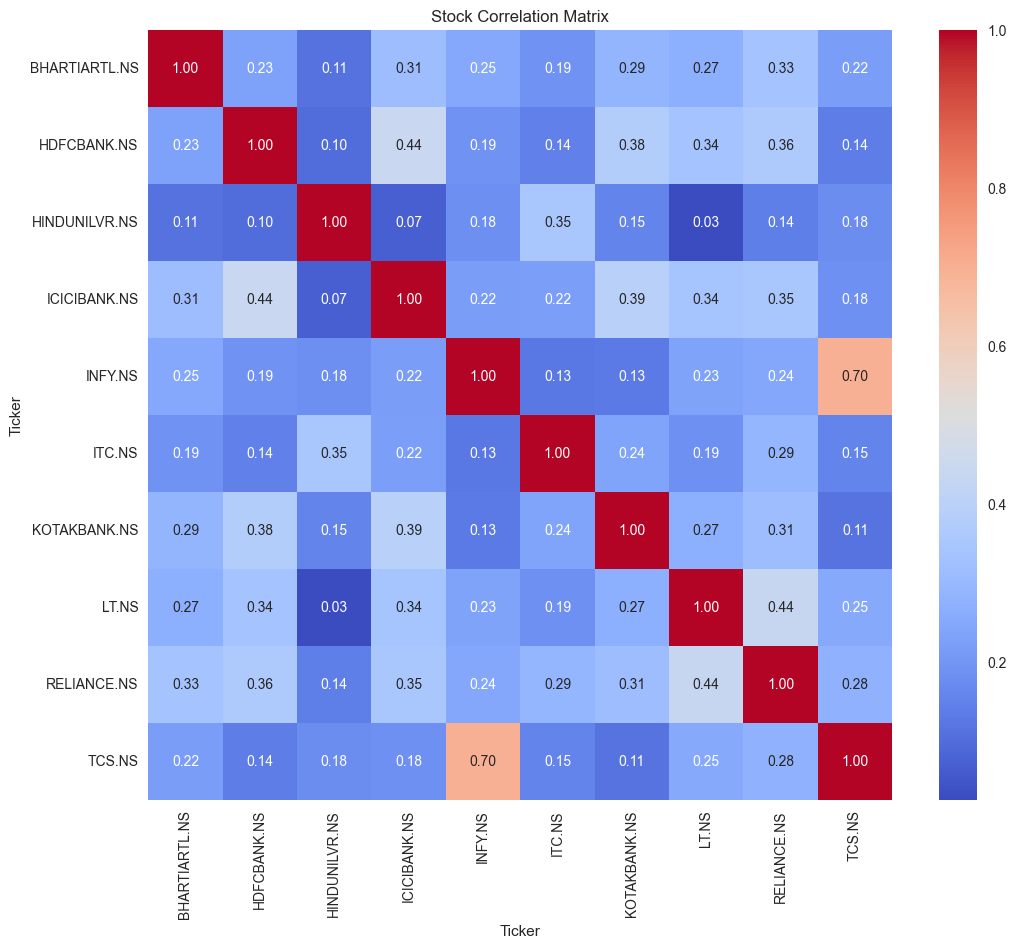

In [5]:
# daily_returns is already calculated above
corr_analyzer = CorrelationAnalysis(daily_returns)

plt.figure(figsize=(12, 10))
corr_matrix = corr_analyzer.calculate_correlation_matrix()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Stock Correlation Matrix')
plt.show()

## 5. Portfolio Optimization
Finding the optimal portfolio allocations using Mean-Variance Optimization.

In [6]:
# Initialize with daily_returns, NOT prices
optimizer = PortfolioOptimizer(daily_returns)

max_sharpe_result = optimizer.optimize_sharpe_ratio()
max_sharpe_weights = max_sharpe_result['weights']

# Display Optimal Weights
weights_df = pd.DataFrame(list(max_sharpe_weights.items()), columns=['Stock', 'Weight'])
weights_df['Weight'] = (weights_df['Weight'] * 100).round(2)
display(weights_df[weights_df['Weight'] > 0].sort_values('Weight', ascending=False))

print(f"\nExpected Annual Return: {max_sharpe_result['return']*100:.2f}%")
print(f"Expected Volatility: {max_sharpe_result['volatility']*100:.2f}%")
print(f"Sharpe Ratio: {max_sharpe_result['sharpe_ratio']:.2f}")

,Stock,Weight
0,BHARTIARTL.NS,68.32
7,LT.NS,17.36
3,ICICIBANK.NS,14.32



Expected Annual Return: 30.83%
Expected Volatility: 16.44%
Sharpe Ratio: 1.45


In [7]:
# Generate Efficient Frontier data
frontier_data = optimizer.generate_efficient_frontier()
min_vol_result = optimizer.optimize_min_volatility()

# Plot using Visualizations class
visualizer = Visualizations()
visualizer.plot_efficient_frontier(frontier_data, 
                                 max_sharpe=max_sharpe_result, 
                                 min_vol=min_vol_result)

Saved: efficient_frontier.png


## 6. Stress Testing
Simulating market crashes to see how the optimized portfolio performs.

In [8]:
# Create stress tester with optimal weights
optimal_weights_array = np.array([max_sharpe_weights[ticker] for ticker in daily_returns.columns])
stress_tester = StressTesting(daily_returns, optimal_weights_array)

# Run scenarios
scenarios = stress_tester.run_stress_tests()
display(scenarios[['Scenario', 'Market Impact (%)', 'Portfolio Impact (%)']])

,Scenario,Market Impact (%),Portfolio Impact (%)
0,COVID Crash 2020,-38.0,-38.0
1,2008 Financial Crisis,-52.0,-52.0
2,Dot-com Bubble 2000,-45.0,-45.0
3,Moderate Correction,-15.0,-15.0
4,Severe Recession,-30.0,-30.0


## 7. Drawdown Analysis
Analyzing historical drawdowns for the optimized portfolio.

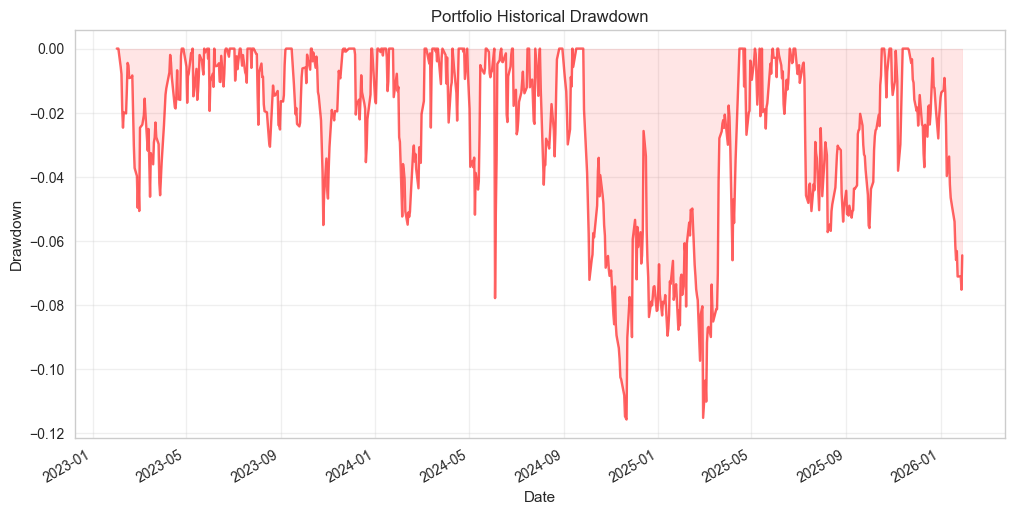

Max Drawdown: -11.57%


In [9]:
drawdown = stress_tester.calculate_drawdown()

plt.figure(figsize=(12, 6))
drawdown.plot(color='red', alpha=0.6)
plt.fill_between(drawdown.index, drawdown, color='red', alpha=0.1)
plt.title('Portfolio Historical Drawdown')
plt.ylabel('Drawdown')
plt.grid(True, alpha=0.3)
plt.show()

print(f"Max Drawdown: {stress_tester.calculate_max_drawdown()*100:.2f}%")